Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Frequency of samples per class:
Classes
A    151
B    123
C     68
Name: count, dtype: int64

Descriptive statistics:
       Sample Number   Feature 1   Feature 2   Feature 3    Feature 4
count     342.000000  342.000000  342.000000  342.000000   342.000000
mean      171.500000   43.921930   17.151170  200.915205  4201.754386
std        98.871128    5.459584    1.974793   14.061714   801.954536
min         1.000000   32.100000   13.100000  172.000000  2700.000000
25%        86.250000   39.225000   15.600000  190.000000  3550.000000
50%       171.500000   44.450000   17.300000  197.000000  4050.000000
75%       256.750000   48.500000   18.700000  213.000000  4750.000000
max       342.000000   59.600000   21.500000  231.000000  6300.000000

Interquartile Range (IQR):
Feature 1 IQR: 9.274999999999999
Feature 2 IQR: 3.0999999999999996
Feature 3 IQR: 23.0
Feature 

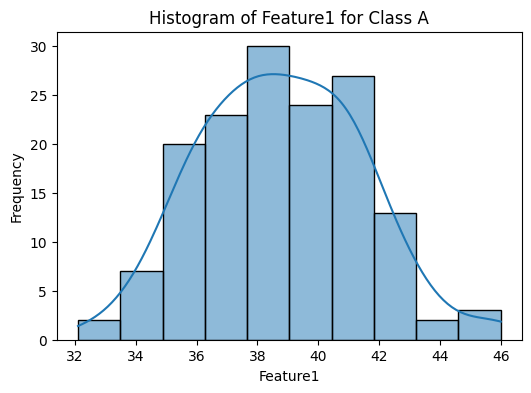

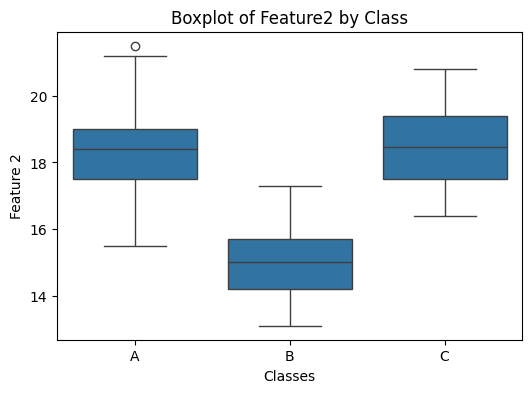

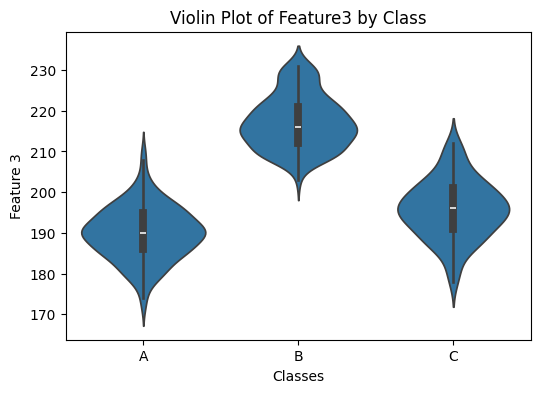

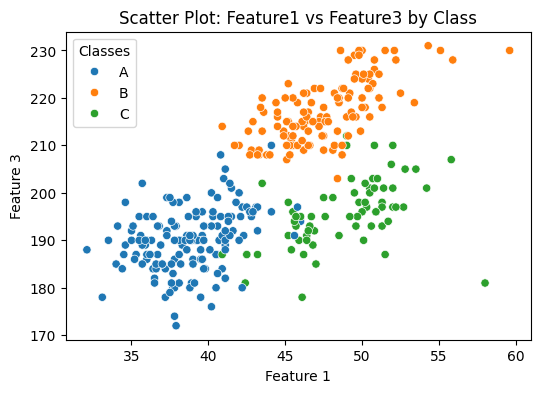

<ipython-input-10-8828d91c6802>:55: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('viridis', len(classes))
<ipython-input-10-8828d91c6802>:68: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


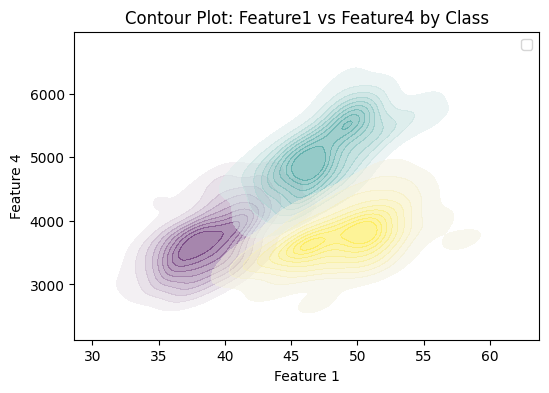

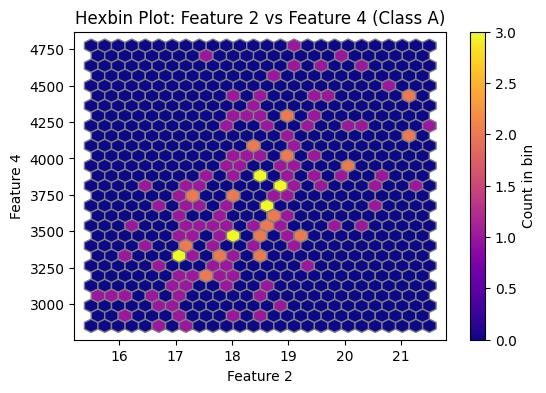

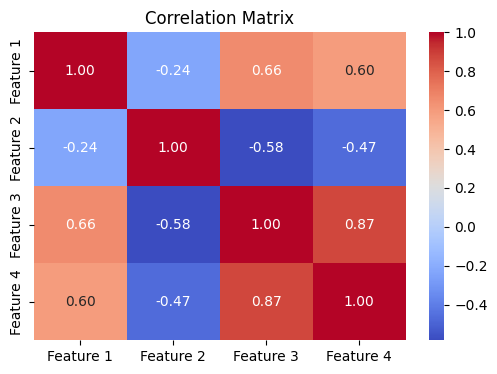

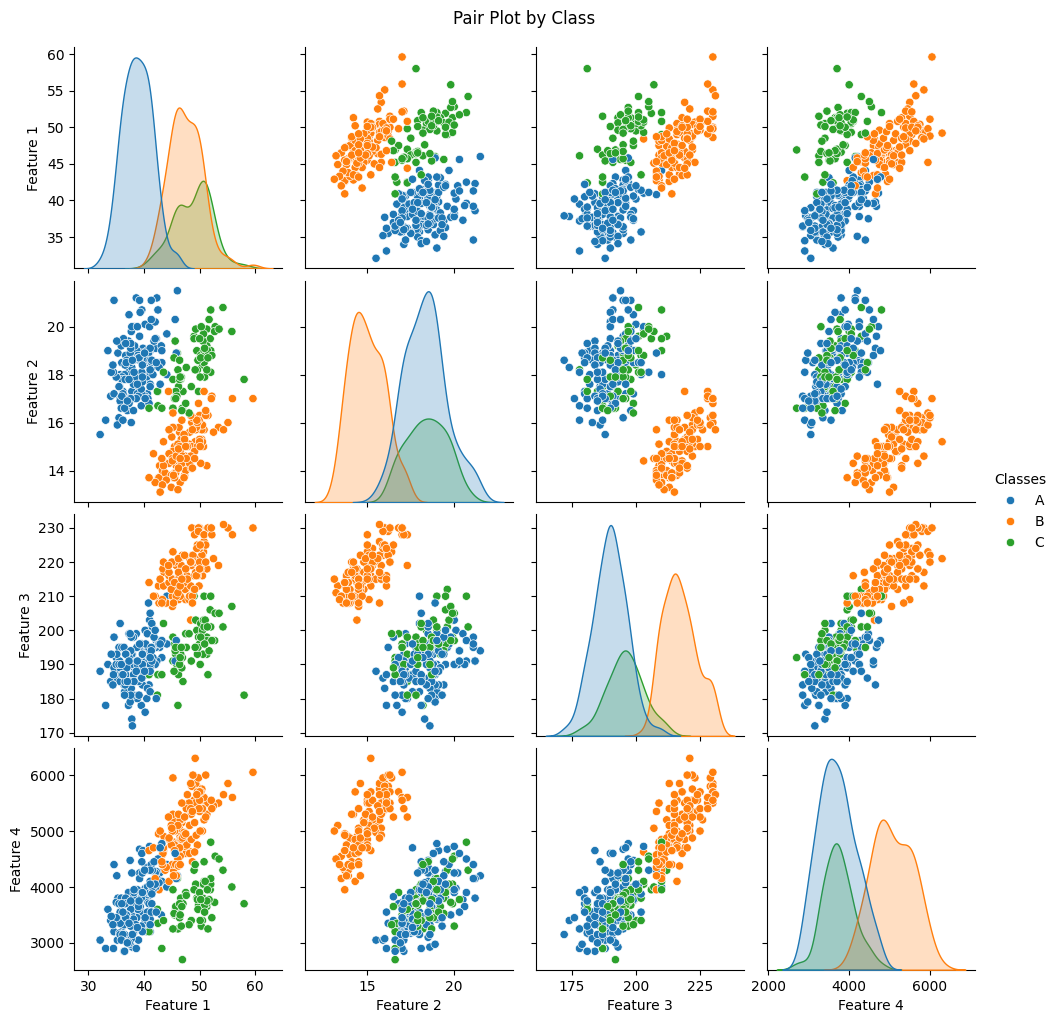

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import iqr
from matplotlib import cm

from google.colab import drive
drive.mount('/content/drive')

# Loading the dataset
df = pd.read_csv('/content/drive/My Drive/A1_data.csv')

# (a) Frequency of samples for each class
print("Frequency of samples per class:")
print(df['Classes'].value_counts())

# (b) Data description and interquartile range
print("\nDescriptive statistics:")
print(df.describe())

print("\nInterquartile Range (IQR):")
for feature in ['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4']:
    print(f"{feature} IQR:", iqr(df[feature]))

# (c) Histogram of Feature 1 for Class A
plt.figure(figsize=(6,4))
sns.histplot(df[df['Classes'] == 'A']['Feature 1'], bins=10, kde=True)
plt.title('Histogram of Feature1 for Class A')
plt.xlabel('Feature1')
plt.ylabel('Frequency')
plt.show()

# (d) Box plot of Feature 2 for each class
plt.figure(figsize=(6,4))
sns.boxplot(x='Classes', y='Feature 2', data=df)
plt.title('Boxplot of Feature2 by Class')
plt.show()

# (e) Violin plot of Feature 3 for each class
plt.figure(figsize=(6,4))
sns.violinplot(x='Classes', y='Feature 3', data=df)
plt.title('Violin Plot of Feature3 by Class')
plt.show()

# (f) Scatter plot between Feature 1 and Feature 3
plt.figure(figsize=(6,4))
sns.scatterplot(x='Feature 1', y='Feature 3', hue='Classes', data=df)
plt.title('Scatter Plot: Feature1 vs Feature3 by Class')
plt.show()

# (g) Contour plot between Feature 1 and Feature 4
plt.figure(figsize=(6,4))
classes = df['Classes'].unique()
colors = cm.get_cmap('viridis', len(classes))
for i, cls in enumerate(classes):
    sns.kdeplot(
        data=df[df['Classes'] == cls],
        x="Feature 1",
        y="Feature 4",
        fill=True,
        thresh=0.05,
        alpha=0.5,
        label=f"Classes {cls}",
        cmap=sns.light_palette(colors(i), as_cmap=True)
    )
plt.title('Contour Plot: Feature1 vs Feature4 by Class')
plt.legend()
plt.show()

# (h) Hexagonal bin plot between Feature 2 and Feature 4 for Class A
plt.figure(figsize=(6,4))
class_A = df[df['Classes'] == 'A']
plt.hexbin(class_A['Feature 2'], class_A['Feature 4'], gridsize=25, cmap='plasma', edgecolors='grey')
plt.colorbar(label='Count in bin')
plt.xlabel('Feature 2')
plt.ylabel('Feature 4')
plt.title('Hexbin Plot: Feature 2 vs Feature 4 (Class A)')
plt.show()

# (i) Correlation matrix
plt.figure(figsize=(6,4))
corr_matrix = df[['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# (j) Pair plot for all four features
sns.pairplot(df, vars=['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4'], hue='Classes', diag_kind='kde')
plt.suptitle("Pair Plot by Class", y=1.02)
plt.show()
